In [2]:
import statistics 
import numpy
import math
import numpy as np
from numpy import log as ln
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


f            Vin       Vout          A_CL         
1.388 MHZ  && 1.38 V && 16.0 mV && 43047.21 \\
763.3 KHZ  && 1.38 V && 16.0 mV && 40281.09 \\ 
523.5 KHZ  && 1.42 V && 14.8 mV && 33581.57 \\
309.8 KHZ && 7.40 V && 7.08 mV && 30327.39 \\
216.9 KHZ && 7.40 V && 62.0 mV && 28530.16 \\
107.7 KHZ && 7.32 V && 45.2 mV && 25713.36 \\
17.76 KHZ && 2.72 V && 16.8 mV && 23561.97 \\ 
6.276 KHZ && 4.40 V && 14.4 mV && 19933.65 \\



$\nu$      &      $V_{in}$    &   $V_{out}$     &       $\delta\phi$     $A_{OL}$
\hline
102.6 KHZ & 2.00 V & 4.20 mV  & 273.33 & 31097.87 \\
63.69 KHZ & 2.04 V & 19.2 mV  & 261.35 & 34750.79 \\
44.68 KHZ & 2.00 V & 26.4 mV  & 266.95 & 37076.48 \\
20.348 KHZ & 600 mV & 816 mV  & 234.4 & 40870.81\\
10.356 KHZ & 600 mV & 184 mV  & 261.58 & 42805.49 \\
8.283 KHZ & 600 mV & 88 mV  & 262.46 & 43242.42 \\ 
6.405 KHZ & 600 mV & 496 mV  & 268.748 & 43650.02 \\
4.11 KHZ & 600 mV & 324 mV  & 236.74 & 44164.13\\
2.52 KHZ & 600 mV & 240 mV  & 257.76 & 44531.17 \\
1.03 KHZ & 660 mV & 1.92V  & 242.658 & 44883.55 \\
855.0 HZ & 260 mV & 27.8 V & 91.45 & 44925.49 \\
740.0 HZ & 200 mV & 23.6 V s & 91.15 & 44953.11 \\
611.0 HZ & 174 mV & 25.4 V  & 92.19 & 44984.16 \\
435.0 HZ & 616 mV & 28.8 V  & 90.85 & 45026.62 \\
331.1 HZ & 404 mV & 24.6 V  & 91.05 & 45051.744 \\
239.9 HZ & 304 mV & 27.4 V & 90.68 & 45073.83 \\ 
142.3 HZ & 180.0 mV & 26.8 V  & 93.23 & 45097.50 \\
75.3 HZ & 90.0 mV & 24.4 V  & 86.75 &  45113.78 \\
42.08 HZ & 1.02V & 23.2 V  & 88.0092 &  45121.85 \\
22.66 HZ & 536 mV & 22.8 V  & 82.1402 & 45126.57 \\





 
102.6 KHZ    2.093  & 31097.87 & 1.388 MHZ  & 43047.21 & 100
63.69 KHZ &  9.38   & 34750.79 & 763.3 KHZ  & 40281.09 & 100
44.68 KHZ  & 13.16  & 37076.48 & 523.5 KHZ  & 33581.57 & 100
20.348 KHZ & 137.36 & 40870.81 & 309.8 KHZ & 30327.39 & 100
10.356 KHZ & 30.97  & 42805.49 & 216.9 KHZ & 28530.16 & 100
8.283 KHZ &  14.81  & 43242.42 & 107.7 KHZ & 25713.36 & 100
6.405 KHZ &  83.49  & 43650.02 & 17.76 KHZ & 23561.97 & 100
4.11 KHZ &  54.54   & 44164.13 & 6.276 KHZ && 19933.65 & 100
2.52 KHZ &  40.40   & 44531.17 
1.03 KHZ &  293.82  & 44883.55 
855.0 HZ &  1176.15 & 44925.49 
740.0 HZ &  1298.0  & 44953.11 
611.0 HZ &  1605.75 & 44984.16 
435.0 HZ &  2711.69 & 45026.62 
331.1 HZ &  3531.68 &45051.744 
239.9 HZ &  5227.63 & 45073.83 
142.3 HZ &  8635.56 & 45097.50 
75.3 HZ  & 15724.44 & 45113.78 
42.08 HZ & 24132.55 & 45121.85 
22.66 HZ & 45132.09 & 45126.57 

 

1.388 MHZ  & 43047.21 & 100
763.3 KHZ  & 40281.09 & 100
523.5 KHZ  & 33581.57 & 100
309.8 KHZ & 30327.39 & 100
216.9 KHZ & 28530.16 & 100
107.7 KHZ & 25713.36 & 100
17.76 KHZ & 23561.97 & 100
6.276 KHZ && 19933.65 & 100






 13.1604,
 9.38
 2.093





In [6]:
R_b=100
R_a=10000
G2=R_a/R_b
Phi=[82.1402,88.0092,86.75,93.23,90.68,91.05,90.85
,92.19,91.15,91.45,242.658,257.76,236.74,268.748,262.46,261.58,234.4,266.95,261.35,273.33]

Freq=[22.66,
 42.08,
 75.3,
 142.3,
 239.9,
 331.1,
 435.0,
 611.0,
 740.0,
 855.0,
 1030.0,
 2520.0,
 4110.0,
 6405.0,
 8283.0,
 10356.0,
 20348.0,
 44680.0,
 63690.0,
 102600.0 ]





In [7]:
a=[0,2.00 , .00420 ,9960]
b=[0,2.04,.0192 ,9960]
c=[0,2.00,.0264, 9960]
d=[0,.600 ,.816,1000 ]
e=[0,.600 ,.184 ,1000]
f=[0,.600, .088, 1000]
g=[0,.600,.496, 1000]
h=[0,.600, .324 ,1000] 
i=[0,.600 , .240 ,1000] 
j=[0,.660 , 1.92 ,1000] 
k=[0,.260 , 27.8 ,100]
l=[0,.200 ,23.6 ,100] 
m=[0,.174 , 25.4 ,100] 
n=[0,.616 , 28.8,570 ] 
o=[0,.404 ,24.6, 570] 
p=[0,.304 , 27.4 ,570]
q=[0,.180,26.8 ,570] 
r=[0,.090 , 24.4 ,570] 
s=[0,1.02,23.2,10600 ] 
t=[0,.536,22.8, 10600] 

In [8]:
A=(a[2]/a[1])*(1/(10/(a[3]+10)))
B=(b[2]/b[1])*(1/(10/(b[3]+10)))
C=(c[2]/c[1])*(1/(10/(c[3]+10)))
D=(d[2]/d[1])*(1/(10/(d[3]+10)))
E=(e[2]/e[1])*(1/(10/(e[3]+10)))
F=(f[2]/f[1])*(1/(10/(f[3]+10)))
G=(g[2]/g[1])*(1/(10/(g[3]+10)))
H=(h[2]/h[1])*(1/(10/(h[3]+10)))
I=(i[2]/i[1])*(1/(10/(i[3]+10)))
J=(j[2]/j[1])*(1/(10/(j[3]+10)))
K=(k[2]/k[1])*(1/(10/(k[3]+10)))
L=(l[2]/l[1])*(1/(10/(l[3]+10)))
M=(m[2]/m[1])*(1/(10/(m[3]+10)))
N=(n[2]/n[1])*(1/(10/(n[3]+10)))
O=(o[2]/o[1])*(1/(10/(o[3]+10)))
P=(p[2]/p[1])*(1/(10/(p[3]+10)))
Q=(q[2]/q[1])*(1/(10/(q[3]+10)))
R=(r[2]/r[1])*(1/(10/(r[3]+10)))
S=(s[2]/s[1])*(1/(10/(s[3]+10)))
T=(t[2]/t[1])*(1/(10/(t[3]+10)))

In [9]:
Gain = [T,S,R,Q,P,O,N,M,L,K,J,I,H,G,F,E,D,C,B,A]

In [10]:
Gain

[45132.0895522388,
 24132.54901960784,
 15724.444444444443,
 8635.555555555555,
 5227.631578947368,
 3531.6831683168316,
 2711.688311688312,
 1605.7471264367816,
 1298.0,
 1176.1538461538462,
 293.81818181818176,
 40.400000000000006,
 54.540000000000006,
 83.49333333333334,
 14.813333333333333,
 30.973333333333336,
 137.35999999999999,
 13.1604,
 9.383529411764705,
 2.0936999999999997]

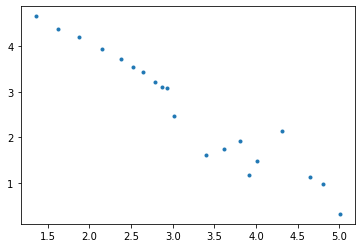

In [131]:
plt.plot(np.log10(Freq),np.log10(Gain),'.')

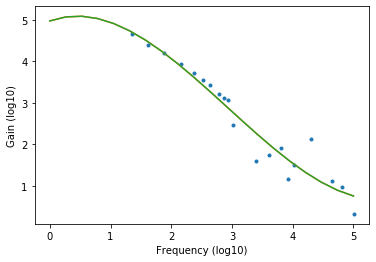

         3          2
0.07229 x - 0.6363 x + 0.5302 x + 4.974


In [32]:
x = np.array(np.log10(Freq))
y = np.array(np.log10(Gain))
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
xp = np.linspace(-0, 5, 20)
p1 = np.poly1d(np.polyfit(x, y, 3))
plt.plot(x, y, '.', xp, p(xp), '-', xp, p1(xp), '-')
plt.title
plt.xlabel("Frequency (log10)")
plt.ylabel("Gain (log10)")
plt.show()
#print(p)
print(p1)

In [107]:
Gain

[45132.0895522388,
 24132.54901960784,
 15724.444444444443,
 8635.555555555555,
 5227.631578947368,
 3531.6831683168316,
 2711.688311688312,
 1605.7471264367816,
 1298.0,
 1176.1538461538462,
 293.81818181818176,
 40.400000000000006,
 54.540000000000006,
 83.49333333333334,
 14.813333333333333,
 30.973333333333336,
 137.35999999999999,
 13.1604,
 9.383529411764705,
 2.0936999999999997]

In [106]:
Freq

[22.66,
 42.08,
 75.3,
 142.3,
 239.9,
 331.1,
 435.0,
 611.0,
 740.0,
 855.0,
 1030.0,
 2520.0,
 4110.0,
 6405.0,
 8283.0,
 10356.0,
 20348.0,
 44680.0,
 63690.0,
 102600.0]

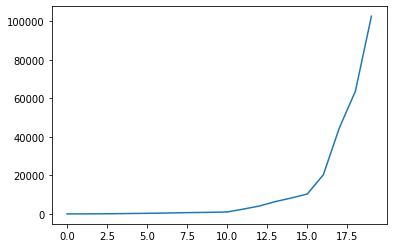

In [115]:
plt.plot([22.66,
 42.08,
 75.3,
 142.3,
 239.9,
 331.1,
 435.0,
 611.0,
 740.0,
 855.0,
 1030.0,
 2520.0,
 4110.0,
 6405.0,
 8283.0,
 10356.0,
 20348.0,
 44680.0,
 63690.0,
 102600.0])

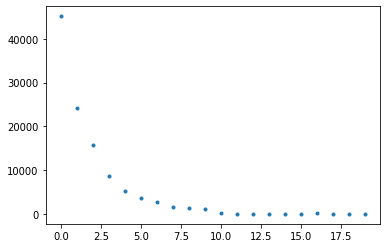

In [117]:
plt.plot([45132.0895522388,
 24132.54901960784,
 15724.444444444443,
 8635.555555555555,
 5227.631578947368,
 3531.6831683168316,
 2711.688311688312,
 1605.7471264367816,
 1298.0,
 1176.1538461538462,
 293.81818181818176,
 40.400000000000006,
 54.540000000000006,
 83.49333333333334,
 14.813333333333333,
 30.973333333333336,
 137.35999999999999,
 13.1604,
 9.383529411764705,
 2.0936999999999997],'.')

D:\Miniconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
D:\Miniconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


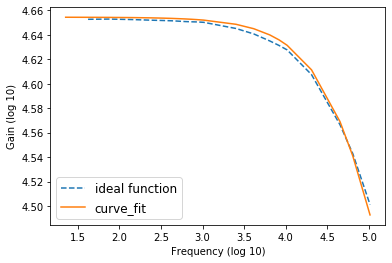

Estimated Cutoff Frequency: 92746.7027739474
fitted   coefficients: 92746.703


In [28]:
#define the function
f = lambda x,x2: max(Gain)/(np.sqrt(1+(x/x2)))
x = Freq
x2=np.linspace(0,100000,20,'.')
y=f(x,x2)


#do the curve fit
params, extras = curve_fit(f, x, y)

plt.plot(np.log10(x),np.log10(f(x,x2)), '--', label='ideal function')
plt.plot(np.log10(x),np.log10(f(x,params[0])),'-', label='curve_fit')
plt.xlabel('Frequency (log 10)')
plt.ylabel('Gain (log 10)')

plt.legend(fontsize=12)
plt.show()
print('Estimated Cutoff Frequency:',params[0])
print('fitted   coefficients: %6.3f' %(params[0]))

In [12]:
A_ol=[]
for i in range(len(Freq)):
    Aol = max(Gain)/(np.sqrt(1+Freq[i]/92746))
    A_ol.append(Aol)

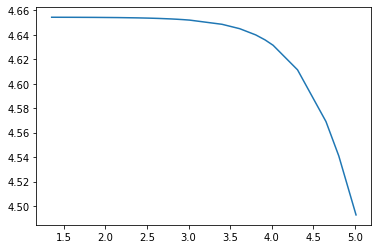

In [13]:
plt.plot(np.log10(Freq),np.log10(A_ol))

In [14]:
A_ol

[45126.5771539324,
 45121.85454307938,
 45113.77944529849,
 45097.50630610153,
 45073.83243617265,
 45051.744613444294,
 45026.62049035283,
 44984.157559308274,
 44953.11034602657,
 44925.48672803104,
 44883.54832427452,
 44531.16632967814,
 44164.13925639674,
 43650.02391289993,
 43242.421745580694,
 42805.49172556838,
 40870.810754624836,
 37076.48737531102,
 34750.790158067095,
 31097.87932111739]

In [36]:
A_cl=[]
for i in A_ol:
    CL=G2/(np.sqrt(((1-G2)**2)/(((i))**2)))
    A_cl.append(CL)


In [37]:
A_cl

[45582.40116558828,
 45577.63085159533,
 45569.4741871702,
 45553.03667282983,
 45529.12367290167,
 45506.81274085282,
 45481.43483874023,
 45438.54298920028,
 45407.18216770361,
 45379.27952326368,
 45336.91749926719,
 44980.97609058398,
 44610.241673128025,
 44090.933245353466,
 43679.21388442494,
 43237.87042986705,
 41283.64722689377,
 37450.99734879901,
 35101.80824047181,
 31411.99931425999]

In [50]:
Freq2=[1.388*10e5   
,763.3*1000  
,523.5*1000 
,309.8*1000 
,216.9 *1000 
,107.7 *1000 
,17.76 *1000 
,6.276 *1000 ]

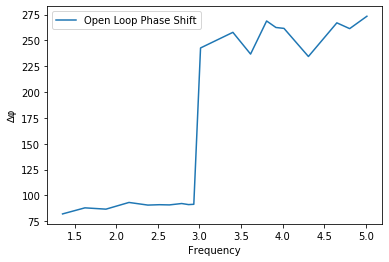

In [4]:
plt.plot(np.log10(Freq),(Phi),label="Open Loop Phase Shift")
plt.xlabel("Frequency")
plt.ylabel("∆φ")
plt.legend()


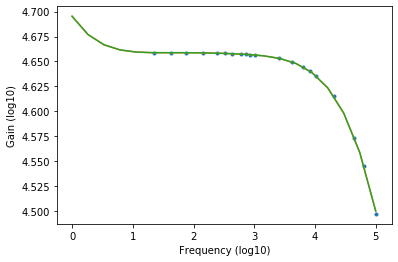

            5            4           3          2
-0.0008427 x + 0.009223 x - 0.04024 x + 0.0861 x - 0.08986 x + 4.695


In [47]:
x = np.array(np.log10(Freq))
y = np.array(np.log10(A_cl))
z = np.polyfit(x, y, 5)
p = np.poly1d(z)
xp = np.linspace(5, 0, 20)
p1 = np.poly1d(np.polyfit(x, y, 5))

plt.plot(x, y, '.', xp, p(xp), '-', xp, p1(xp), '-')

plt.title
plt.xlabel("Frequency (log10)")
plt.ylabel("Gain (log10)")
plt.show()
#print(p)
print(p1)

In [410]:
max(Gain)

45132.0895522388

In [411]:
Gain

[45132.0895522388,
 24132.54901960784,
 15724.444444444443,
 8635.555555555555,
 5227.631578947368,
 3531.6831683168316,
 2711.688311688312,
 1605.7471264367816,
 1298.0,
 1176.1538461538462,
 293.81818181818176,
 40.400000000000006,
 54.540000000000006,
 83.49333333333334,
 14.813333333333333,
 30.973333333333336,
 137.35999999999999,
 13.1604,
 9.383529411764705,
 2.0936999999999997]

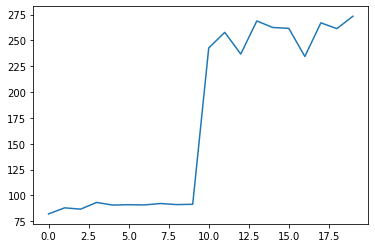

In [429]:
plt.plot(Phi)

In [421]:
Phi

[82.1402,
 88.0092,
 86.75,
 93.23,
 90.68,
 91.05,
 90.85,
 92.19,
 91.15,
 91.45,
 242.658,
 257.76,
 236.74,
 268.748,
 262.46,
 261.58,
 234.4,
 266.95,
 261.35,
 273.33]

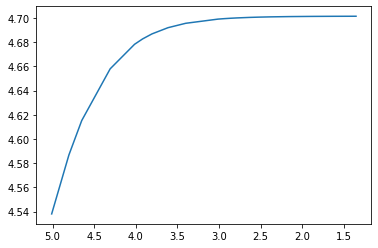

In [505]:
plt.plot(np.log10(Freq),(A_cl))
# grab a reference to the current axes
ax = plt.gca()
# set the xlimits to be the reverse of the current xlimits
ax.set_xlim(ax.get_xlim()[::-1])
# call `draw` to re-render the graph
plt.draw()


In [52]:
AOL =[]
for i in Freq2:
    set=(-1973*(np.log10(i)**2))+(9754*np.log10(i))+3.446e04
    AOL.append(set)
    

In [56]:
AOL.reverse()

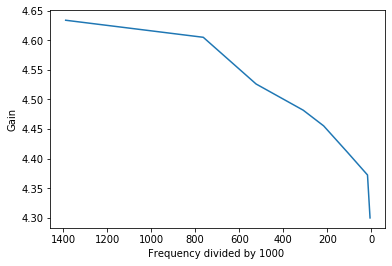

In [63]:
plt.plot(((Freq3)),(np.log10(AOL)))
plt.xlabel("Frequency divided by 1000 ")
plt.ylabel("Gain")
# grab a reference to the current axes
ax = plt.gca()
# set the xlimits to be the reverse of the current xlimits
ax.set_xlim(ax.get_xlim()[::-1])
# call `draw` to re-render the graph
plt.draw()



In [589]:
AOL.reverse()

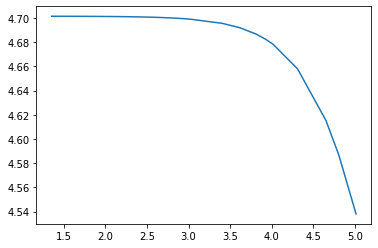

In [534]:
plt.plot(np.log10(Freq),A_cl)
plt.xlabel()

In [522]:
AOL.reverse()

In [61]:
Freq3=[]
for i in Freq2:
    awd = i/1000
    Freq3.append(awd)

In [537]:
AOL

[43047.212682074125,
 40281.09534883209,
 33581.568462812924,
 30327.386639595497,
 28530.16125624531,
 25713.3594498932,
 23561.96728502759,
 19933.65175109201]

In [38]:
x = np.array(W)
y = np.array((A_cl))
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
import matplotlib.pyplot as plt
xp = np.linspace(max(Freq),0 , 20)
p1 = np.poly1d(np.polyfit(x, y, 2))
plt.plot(x, y, '.', xp, p(xp), '-', xp, p1(xp), '-')
plt.show()
#print(p)
print(p1)

NameError: name 'W' is not defined

In [545]:
20*np.log10(40000)

92.04119982655925

In [563]:
np.std(A_ol)/np.sqrt(len(A_ol))

864.2425179623394

In [564]:
np.std(AOL)/np.sqrt(len(AOL))

2648.9540012786288

In [566]:
np.sum([7,7.3,7.6,6.7,6.3])

34.9

In [569]:
73-40

33

In [60]:
Freq3

NameError: name 'Freq3' is not defined